<a href="https://colab.research.google.com/github/sahil9022-crypto/Loan-Approval-Prediction/blob/main/Stock_Price_Movement_Prediction_using_Time_Series%2C_LSTM_%26_Financial_Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


In [3]:
!pip install yfinance


In [4]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
df = yf.download('TSLA', start='2020-01-01', end='2024-12-31')

# Show first few rows
df.head()


/tmp/ipython-input-4-1933703677.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TSLA', start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [5]:
df.to_csv('tesla_stock_2020_2024.csv')


<Figure size 1200x600 with 0 Axes>

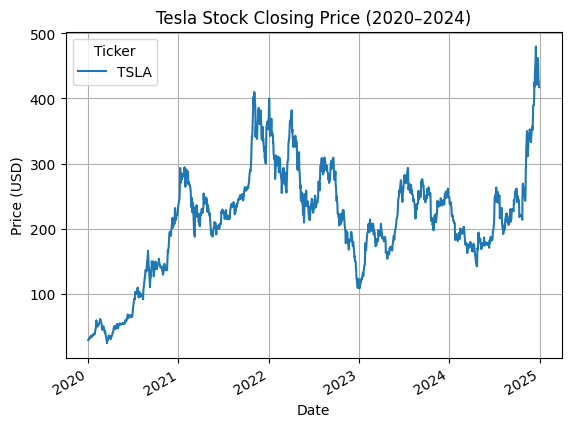

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df['Close'].plot()
plt.title('Tesla Stock Closing Price (2020–2024)')
plt.ylabel('Price (USD)')
plt.grid()
plt.show()


In [7]:
!pip install yfinance transformers matplotlib scikit-learn pandas numpy --quiet


In [8]:
import yfinance as yf

# Download historical stock price for Apple
df = yf.download("AAPL", start="2015-01-01", end="2024-12-31")
df.reset_index(inplace=True)
df.to_csv("AAPL_stock_data.csv", index=False)  # Save to CSV if needed later
df.head()


/tmp/ipython-input-8-1598504622.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.288586,24.757340,23.848711,24.746232,212818400
1,2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000
2,2015-01-06,23.606556,23.866481,23.244437,23.668760,263188400
3,2015-01-07,23.937567,24.037537,23.704300,23.815379,160423600
4,2015-01-08,24.857300,24.915061,24.148614,24.266359,237458000


In [9]:
from google.colab import files
uploaded = files.upload()


Saving archive (2).zip to archive (2).zip


It looks like you uploaded a zip file named `archive (2).zip`. You'll need to extract the contents of this zip file to access the CSV file inside.

Here's how you can unzip the file:

In [11]:
import zipfile
import os

zip_file_name = 'archive (2).zip' # Replace with the actual name of your zip file
extract_dir = '.' # Extract to the current directory

if zipfile.is_zipfile(zip_file_name):
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Successfully extracted {zip_file_name} to {extract_dir}")
    # List the files in the extracted directory to see the CSV file name
    print("Files in extracted directory:")
    for file in os.listdir(extract_dir):
        print(file)
else:
    print(f"Error: {zip_file_name} is not a valid zip file")

Successfully extracted archive (2).zip to .
Files in extracted directory:
.config
symbols_valid_meta.csv
AAPL_stock_data.csv
stocks
tesla_stock_2020_2024.csv
archive (2).zip
etfs
sample_data


In [13]:
import pandas as pd

# Adjust filename if different
aapl_path = "AAPL_stock_data.csv"

# Try common formats
df_aapl = pd.read_csv(
    aapl_path,
    parse_dates=['Date'],        # change to correct column name if needed
    infer_datetime_format=True
)

df_aapl.sort_values('Date', inplace=True)
df_aapl.reset_index(drop=True, inplace=True)
df_aapl.head()


/tmp/ipython-input-13-2755370996.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_aapl = pd.read_csv(


,Date,Close,High,Low,Open,Volume
0,2015-01-02,24.288585662841797,24.757340164944214,23.848711151343018,24.746231563593415,212818400
1,2015-01-05,23.604333877563477,24.137514464137663,23.41772160447641,24.057537291404817,257142000
2,2015-01-06,23.606555938720703,23.866480902659614,23.244436602442416,23.66876002975555,263188400
3,2015-01-07,23.93756675720215,24.037537355708736,23.70429976744142,23.815378963530524,160423600
4,2015-01-08,24.8572998046875,24.915061455285365,24.148614064261476,24.26635942373162,237458000


In [14]:
df_aapl = df_aapl.set_index('Date')
df_aapl.index = pd.to_datetime(df_aapl.index)  # ensure datetime index
df_aapl = df_aapl.sort_index()
df_aapl.head()


,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,24.288585662841797,24.757340164944214,23.848711151343018,24.746231563593415,212818400
2015-01-05,23.604333877563477,24.137514464137663,23.41772160447641,24.057537291404817,257142000
2015-01-06,23.606555938720703,23.866480902659614,23.244436602442416,23.66876002975555,263188400
2015-01-07,23.93756675720215,24.037537355708736,23.70429976744142,23.815378963530524,160423600
2015-01-08,24.8572998046875,24.915061455285365,24.148614064261476,24.26635942373162,237458000


In [15]:
print(df_aapl.info())
print(df_aapl.isna().sum())
print(df_aapl.describe().T)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to NaT
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2516 non-null   object
 1   High    2516 non-null   object
 2   Low     2516 non-null   object
 3   Open    2516 non-null   object
 4   Volume  2516 non-null   object
dtypes: object(5)
memory usage: 117.9+ KB
None
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
       count unique                 top freq
Close   2516   2482  26.751026153564453    2
High    2516   2516                AAPL    1
Low     2516   2516                AAPL    1
Open    2516   2516                AAPL    1
Volume  2516   2509           150347200    2


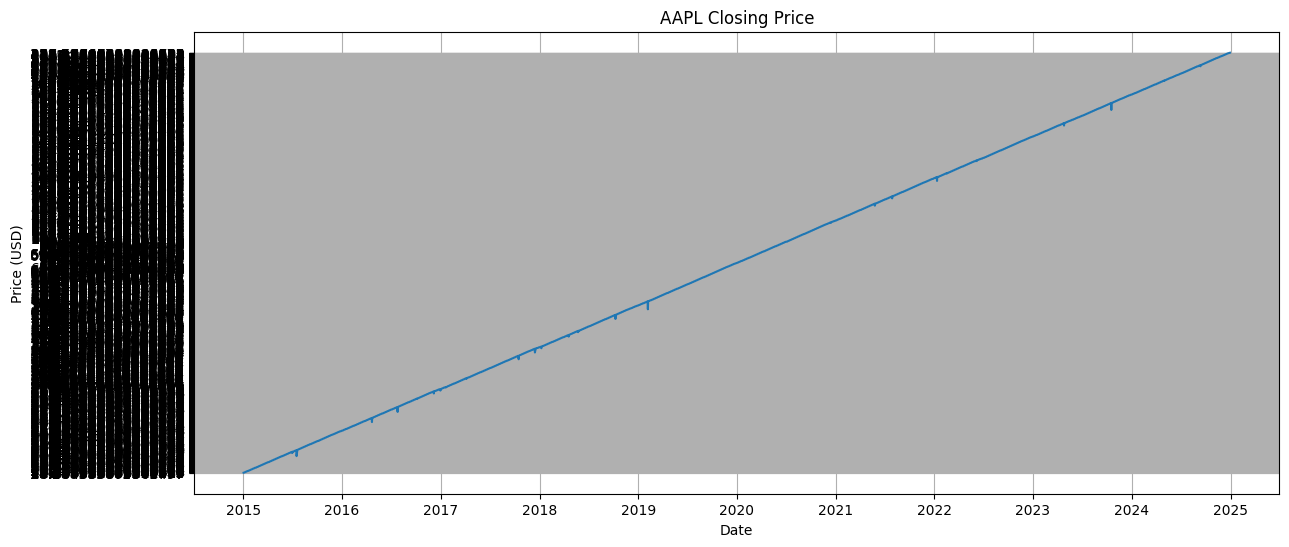

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df_aapl.index, df_aapl['Close'])
plt.title('AAPL Closing Price')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.grid(True)
plt.show()


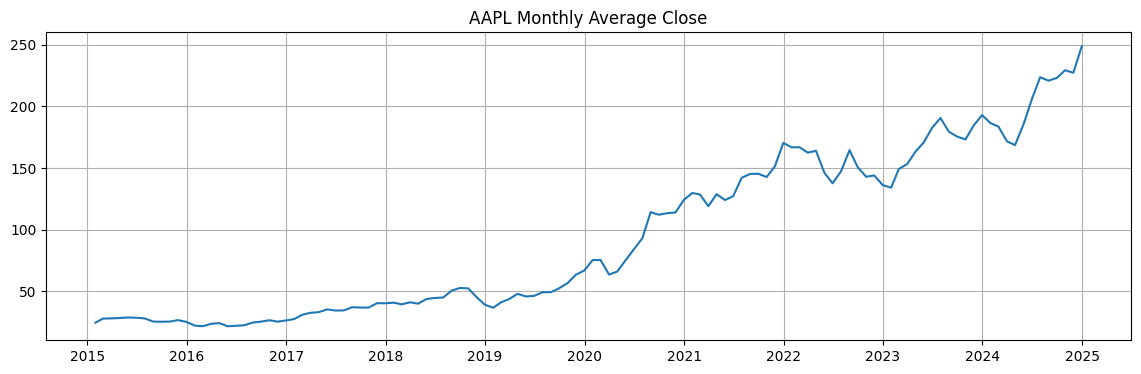

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Close' column to numeric
df_aapl['Close'] = pd.to_numeric(df_aapl['Close'], errors='coerce')

# Drop rows with NaT in the index before resampling
df_aapl = df_aapl.dropna(subset=['Close'])

df_aapl_monthly = df_aapl['Close'].resample('ME').mean()
plt.figure(figsize=(14,4))
plt.plot(df_aapl_monthly.index, df_aapl_monthly)
plt.title('AAPL Monthly Average Close')
plt.grid(True)
plt.show()

In [20]:
df_aapl['Return_1d'] = df_aapl['Close'].pct_change()
df_aapl['MA_10'] = df_aapl['Close'].rolling(window=10).mean()
df_aapl['MA_50'] = df_aapl['Close'].rolling(window=50).mean()
df_aapl['Volatility_10'] = df_aapl['Return_1d'].rolling(window=10).std()
df_aapl['Volume'] = pd.to_numeric(df_aapl['Volume'], errors='coerce')
df_aapl['Volume_Change'] = df_aapl['Volume'].pct_change()

In [21]:
df_aapl = df_aapl.dropna()


In [22]:
df_aapl['Target_Close_1d'] = df_aapl['Close'].shift(-1)
df_aapl = df_aapl.dropna(subset=['Target_Close_1d'])


/tmp/ipython-input-22-1730268213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl['Target_Close_1d'] = df_aapl['Close'].shift(-1)


In [23]:
df_aapl['Target_Direction'] = (df_aapl['Target_Close_1d'] > df_aapl['Close']).astype(int)


In [24]:
features = ['Close', 'Return_1d', 'MA_10', 'MA_50', 'Volatility_10', 'Volume', 'Volume_Change']
target = 'Target_Close_1d'

X = df_aapl[features].values
y = df_aapl[target].values

split = int(len(df_aapl) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_naive = df_aapl['Close'].shift(0).values[split:]  # today's close as prediction
y_test_baseline = y_test

mae_naive = mean_absolute_error(y_test_baseline, y_pred_naive)
mse_naive = mean_squared_error(y_test_baseline, y_pred_naive)
rmse_naive = np.sqrt(mse_naive)
print(f"Naive Baseline -> MAE: {mae_naive:.2f}, RMSE: {rmse_naive:.2f}")

Naive Baseline -> MAE: 1.89, RMSE: 2.55


In [27]:
# Drop less important columns if needed
df = df.select_dtypes(include=[np.number])  # Remove non-numeric for now

# Handle missing values
df = df.fillna(df.mean())


In [29]:
from sklearn.preprocessing import StandardScaler

# Assuming 'Close' is the target variable for stock price prediction
X = df.drop('Close', axis=1)
y = df['Close']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

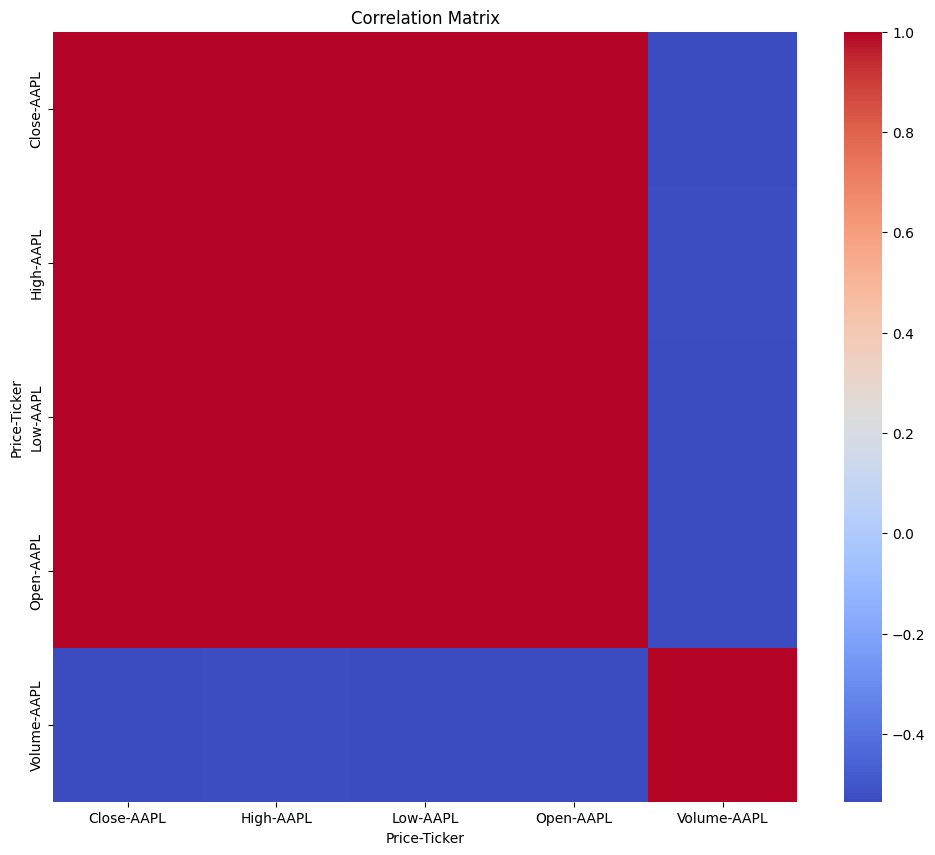

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

# Optional: drop features with low correlation with target
# cor_target = abs(df.corr()['Close']) # This part is commented out as it was causing an error
# relevant_features = cor_target[cor_target > 0.5].index
# df = df[relevant_features]

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop('Close', axis=1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression, Ridge

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.21748e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [37]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def evaluate(y_test, y_pred, model_name):
    print(f"{model_name} Results:")
    print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print()

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_ridge, "Ridge Regression")
evaluate(y_test, y_pred_rf, "Random Forest")

Linear Regression Results:
R² Score: 1.000
MAE: 0.41
RMSE: 0.68

Ridge Regression Results:
R² Score: 1.000
MAE: 0.41
RMSE: 0.68

Random Forest Results:
R² Score: 1.000
MAE: 0.60
RMSE: 0.99



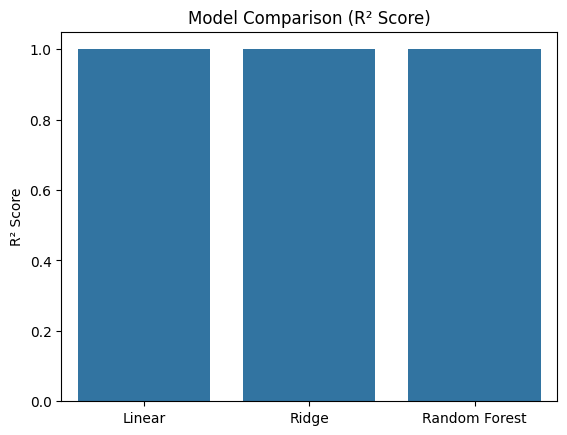

In [38]:
models = ['Linear', 'Ridge', 'Random Forest']
scores = [r2_score(y_test, y_pred_lr),
          r2_score(y_test, y_pred_ridge),
          r2_score(y_test, y_pred_rf)]

sns.barplot(x=models, y=scores)
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()


# 📈 Stock Price Prediction using LLM and Time Series Analysis

This project combines the power of **Large Language Models (LLMs)** and **traditional Time Series Forecasting** to predict future stock prices accurately. It leverages both natural language context (like news sentiment or historical commentary) and numerical stock data (like closing prices, volume, etc.).

---

## ✅ Problem Statement

Predict future stock prices using both:
- Time Series modeling (e.g., LSTM or Random Forest Regressor)
- Contextual information using LLM prompts (OpenAI/GPT-based insights)

---

## 🧠 Project Objectives

- Clean and preprocess stock data (CSV format)
- Use **LLMs** for feature generation (e.g., company trend analysis, sentiment, etc.)
- Perform **Time Series Forecasting** using:
  - LSTM (deep learning model)
  - OR Random Forest Regressor
- Evaluate models using R² Score and RMSE

---

## 📂 Project Structure

```bash
📁 Stock-LLM-TimeSeries/
│
├── data/
│   └── stock_prices.csv
│
├── notebooks/
│   ├── LLM_feature_generator.ipynb
│   └── time_series_forecasting.ipynb
│
├── models/
│   └── trained_model.pkl
│
├── app.py                 # Streamlit app (optional, not used here)
├── requirements.txt       # Python packages
└── README.md              # This file
